In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('seaborn-whitegrid')
import math
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
train = pd.read_csv('train_clean.csv', index_col='Unnamed: 0')
weather = pd.read_csv('weather_clean.csv')
spray = pd.read_csv('spray_clean.csv', index_col='Unnamed: 0')

In [3]:
train.drop(columns=['Year','Month'], inplace=True)

In [4]:
train.head()

,Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1
4,2007-05-29,CULEX RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1


In [5]:
train.shape

(10506, 10)

In [6]:
spray.drop(columns=['Year','Month'], inplace=True)

In [7]:
spray.head(2)

,Date,Latitude,Longitude,Day,midpoint,midpt_Lat,midpt_Lon,Station,geometry,Coord,YearMonth,Week
0,2011-08-29,42.391623,-88.089163,29,"(42.39233059621053, -88.0933703683158)",42.392331,-88.09337,1,POINT (-88.09337036831577 42.39233059621053),"(42.39162333, -88.08916333)",2011-08,35
1,2011-08-29,42.391348,-88.089163,29,"(42.39233059621053, -88.0933703683158)",42.392331,-88.09337,1,POINT (-88.09337036831577 42.39233059621053),"(42.39134833, -88.08916333)",2011-08,35


In [8]:
spray.columns

Index(['Date', 'Latitude', 'Longitude', 'Day', 'midpoint', 'midpt_Lat',
       'midpt_Lon', 'Station', 'geometry', 'Coord', 'YearMonth', 'Week'],
      dtype='object')

In [9]:
spray = spray[['Date', 'Latitude', 'Longitude', 'Day','YearMonth', 'Week']]

In [10]:
spray.head()

,Date,Latitude,Longitude,Day,YearMonth,Week
0,2011-08-29,42.391623,-88.089163,29,2011-08,35
1,2011-08-29,42.391348,-88.089163,29,2011-08,35
2,2011-08-29,42.391022,-88.089157,29,2011-08,35
3,2011-08-29,42.390637,-88.089158,29,2011-08,35
4,2011-08-29,42.390410,-88.088858,29,2011-08,35


In [11]:
weather.rename(columns={'Date':'Day','CalendarDate':'Date'},inplace=True)

In [12]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day,DaylightDuration
0,1,2007-05-01 00:00:00,83,50,67,14,51,56,0,2,2007-05-01 04:48:00,2007-05-01 18:49:00,NaN,0,0.0,0.0,29.10,29.82,1.7,27,9.2,2007,5,1,0 days 14:01:00.000000000
1,2,2007-05-01 00:00:00,84,52,68,14,51,57,0,3,2007-05-01 04:48:00,2007-05-01 18:49:00,NaN,0,0.0,0.0,29.18,29.82,2.7,25,9.6,2007,5,1,0 days 14:01:00.000000000
2,1,2007-05-02 00:00:00,59,42,51,-3,42,47,14,0,2007-05-02 04:47:00,2007-05-02 18:50:00,BR,0,0.0,0.0,29.38,30.09,13.0,4,13.4,2007,5,2,0 days 14:03:00.000000000
3,2,2007-05-02 00:00:00,60,43,52,-3,42,47,13,0,2007-05-02 04:47:00,2007-05-02 18:50:00,BR HZ,0,0.0,0.0,29.44,30.08,13.3,2,13.4,2007,5,2,0 days 14:03:00.000000000
4,1,2007-05-03 00:00:00,66,46,56,2,40,48,9,0,2007-05-03 04:46:00,2007-05-03 18:51:00,NaN,0,0.0,0.0,29.39,30.12,11.7,7,11.9,2007,5,3,0 days 14:05:00.000000000


In [13]:
train['Date'] = pd.to_datetime(train['Date'])
weather['Date'] = pd.to_datetime(weather['Date'])
spray['Date'] = pd.to_datetime(spray['Date'])

In [14]:
merge_tw = pd.merge(train,weather,on=['Station','Date'], how = 'left')

In [15]:
merge_tw.head()

,Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day,DaylightDuration
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000
4,2007-05-29,CULEX RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000


In [16]:
merge_tw.shape

(10506, 33)

In [ ]:
def has_been_sprayed(train, spray, time_period=1):
    # Iterating over those 10 unique dates that spray took place
    for date in spray['Date'].unique():
        spray_tem = spray[spray['Date'] == date]
        # Resetting index to make iterating easier
        spray_tem.index = range(0, len(spray_tem))
        
        # create column for those unique dates and initialise rows to 0 or 1 if trap has been sprayed
        col_name = 'spray_'+str(date)+"_"+str(time_period)
        train[col_name] = 0

        # Iterate each row in Train data to determine if a trap is in the spray location and if spray is considered in the past
        for r in range(0,len(train)):
            if train.get_value(r,'Date') > date and train.get_value(r,'Date') < date + pd.Timedelta(weeks=1):
                # cast coord to ints and multiplaying by 100 to truncate precision (taking pin points and making them into squares)
                cur_lat = int(train.get_value(r, 'Latitude') * 100)
                cur_lon = int(train.get_value(r, 'Longitude') * 100)
                
                # Iterating over each value in my spray data
                for i in range(0, len(spray_tem)):

                    spray_lat = int(spray_tem.get_value(i,'Latitude')*100)
                    spray_lon = int(spray_tem.get_value(i,'Longitude')*100)

                    # I am now checking if something is in the square +/- some threshold
                    if (cur_lat < spray_lat + 10 and cur_lat > spray_lat - 10) and \
                    (cur_lon < spray_lon + 10 and cur_lon > spray_lon - 10):
                        train.set_value(r,col_name, 1)
                        break

In [ ]:
# has_been_sprayed(merge_tw,spray)

In [17]:
len(merge_tw.Trap.value_counts())

136

In [18]:
len(merge_tw.Latitude.value_counts())

138

In [19]:
traps = merge_tw.groupby(['Latitude','Longitude'])['Trap'].agg(['unique','count'])
traps

,,unique,count
Latitude,Longitude,,
41.644612,-87.604498,[T097],17
41.659112,-87.538693,[T221],112
41.662014,-87.724608,[T135],183
41.673408,-87.599862,[T115],542
41.678618,-87.559308,[T200],129
41.680946,-87.535198,[T212],152
41.682587,-87.707973,[T158],147
41.686398,-87.531635,[T215],45
41.688324,-87.676709,[T086],86


In [20]:
traps['unique'].value_counts().head()

[T035]    2
[T009]    2
[T151]    1
[T028]    1
[T209]    1
Name: unique, dtype: int64

In [21]:
spray.shape

(14294, 6)

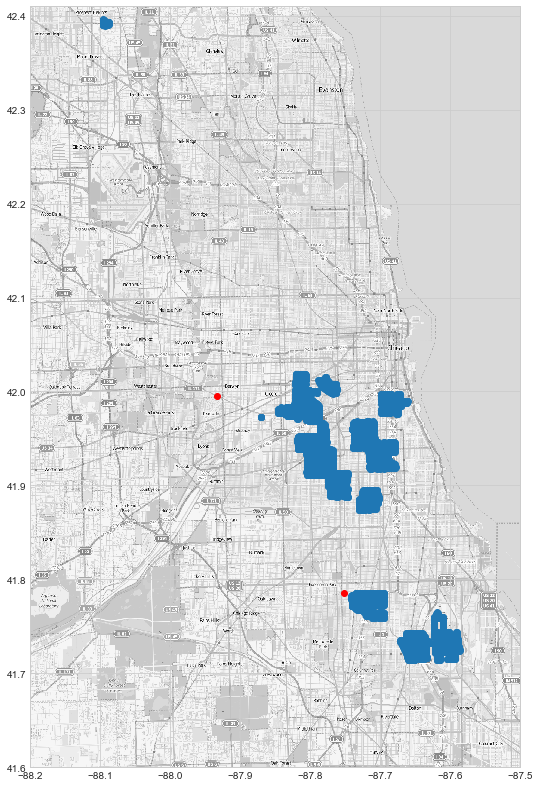

In [22]:
mapdata = np.loadtxt("./data/west_nile/input/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88.2, -87.5, 41.6, 42.41)

plt.figure(figsize=(12,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('Greys_r'), 
           extent=lon_lat_box, 
           aspect=aspect)

# locations = aggregated[['Longitude', 'Latitude']].drop_duplicates().values

plt.scatter([-87.933,-87.752],[41.995,41.786], marker = 'o', c='red')
plt.scatter(spray.Longitude, spray.Latitude ,marker = 'o')

In [23]:
spray = spray[spray['Latitude'] < 42.1]

In [24]:
spray.shape

(14199, 6)

In [25]:
merge_tw.to_csv('merged_train_weather.csv')

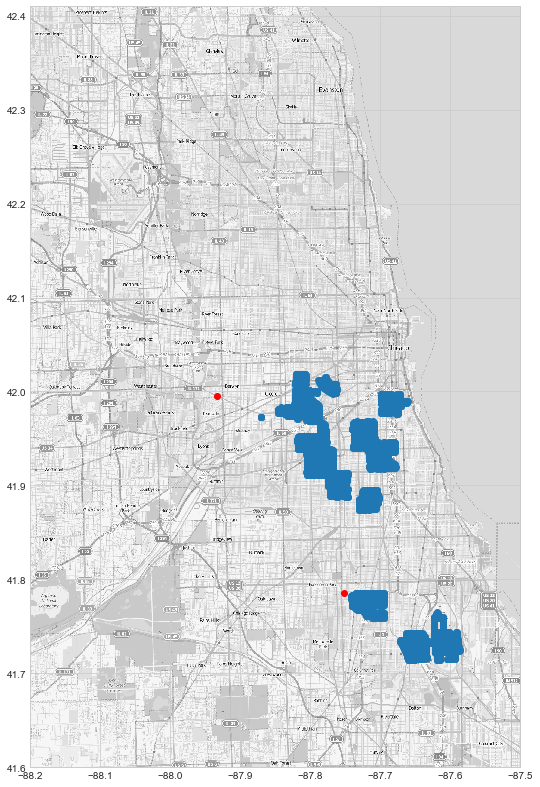

In [26]:
mapdata = np.loadtxt("./data/west_nile/input/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88.2, -87.5, 41.6, 42.41)

plt.figure(figsize=(12,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('Greys_r'), 
           extent=lon_lat_box, 
           aspect=aspect)

# locations = aggregated[['Longitude', 'Latitude']].drop_duplicates().values

plt.scatter([-87.933,-87.752],[41.995,41.786], marker = 'o', c='red')
plt.scatter(spray.Longitude, spray.Latitude ,marker = 'o')

In [27]:
import math
def midpoint_coordinates(coordinates_list):
    x = 0.0
    y = 0.0
    z = 0.0
    for coordinates in coordinates_list:
        latitude  = coordinates[0] * math.pi / 180
        longitude = coordinates[1] * math.pi / 180
        x += math.cos(latitude) * math.cos(longitude)
        y += math.cos(latitude) * math.sin(longitude)
        z += math.sin(latitude)
    total = len(coordinates_list)
    x = x / total
    y = y / total
    z = z / total
    centralLongitude = math.atan2(y, x)
    centralSquareRoot = math.sqrt(x * x + y * y)
    centralLatitude = math.atan2(z, centralSquareRoot)
    return [centralLatitude * 180 / math.pi, centralLongitude * 180 / math.pi]

In [28]:
midpoint_dict = {}
for i in spray.Date.unique():
    spray_coord = spray.loc[spray['Date'] == i, ['Latitude','Longitude']].values.astype(float).tolist()
    # print(midpoint_coordinates(spray_coord))
    midpoint = midpoint_coordinates(spray_coord)
    midpoint_dict[i] = midpoint

midpoint_dict

{numpy.datetime64('2011-07-09T00:00:00.000000000'): [41.982274630447726,
  -87.80995250291352],
 numpy.datetime64('2013-07-17T00:00:00.000000000'): [41.798583341594615,
  -87.68103604746935],
 numpy.datetime64('2013-07-25T00:00:00.000000000'): [41.95453488101255,
  -87.72287906332113],
 numpy.datetime64('2013-08-08T00:00:00.000000000'): [41.931466768022375,
  -87.69703534262085],
 numpy.datetime64('2013-08-15T00:00:00.000000000'): [41.92600815024898,
  -87.78316689461047],
 numpy.datetime64('2013-08-16T00:00:00.000000000'): [41.95780944169083,
  -87.78064599735848],
 numpy.datetime64('2013-08-22T00:00:00.000000000'): [41.814065600294775,
  -87.66596380649031],
 numpy.datetime64('2013-08-29T00:00:00.000000000'): [41.86012943854224,
  -87.7032633759398],
 numpy.datetime64('2013-05-09T00:00:00.000000000'): [42.005435944515575,
  -87.81308540540697]}

In [29]:
spray['midpoint'] = spray['Date'].map(midpoint_dict)
spray[['midpt_Lat','midpt_Lon']] = pd.DataFrame(spray.midpoint.values.tolist(), index = spray.index)

In [30]:
spray.head()

,Date,Latitude,Longitude,Day,YearMonth,Week,midpoint,midpt_Lat,midpt_Lon
95,2011-07-09,41.981433,-87.787777,9,2011-07,27,"[41.982274630447726, -87.80995250291352]",41.982275,-87.809953
96,2011-07-09,41.980998,-87.787778,9,2011-07,27,"[41.982274630447726, -87.80995250291352]",41.982275,-87.809953
97,2011-07-09,41.980560,-87.787762,9,2011-07,27,"[41.982274630447726, -87.80995250291352]",41.982275,-87.809953
98,2011-07-09,41.980198,-87.787758,9,2011-07,27,"[41.982274630447726, -87.80995250291352]",41.982275,-87.809953
99,2011-07-09,41.979752,-87.787765,9,2011-07,27,"[41.982274630447726, -87.80995250291352]",41.982275,-87.809953


In [31]:
spray_to_merge = spray[['Date','midpt_Lat','midpt_Lon']]
spray_to_merge.drop_duplicates()

,Date,midpt_Lat,midpt_Lon
95,2011-07-09,41.982275,-87.809953
2209,2013-07-17,41.798583,-87.681036
4411,2013-07-25,41.954535,-87.722879
6018,2013-08-08,41.931467,-87.697035
7213,2013-08-15,41.926008,-87.783167
9881,2013-08-16,41.957809,-87.780646
10022,2013-08-22,41.814066,-87.665964
11609,2013-08-29,41.860129,-87.703263
13911,2013-05-09,42.005436,-87.813085


In [32]:
traps.head()

,,unique,count
Latitude,Longitude,,
41.644612,-87.604498,[T097],17
41.659112,-87.538693,[T221],112
41.662014,-87.724608,[T135],183
41.673408,-87.599862,[T115],542
41.678618,-87.559308,[T200],129


In [33]:
traps.reset_index(inplace=True)  

In [34]:
traps.head()

,Latitude,Longitude,unique,count
0,41.644612,-87.604498,[T097],17
1,41.659112,-87.538693,[T221],112
2,41.662014,-87.724608,[T135],183
3,41.673408,-87.599862,[T115],542
4,41.678618,-87.559308,[T200],129


In [ ]:
properties=pd.DataFrame({'propertyID':['13425','32535','43255','52521'],    # merge_tw - # traps
                 'lat':[-37.79230,-37.86400,-37.85450,-37.71870],
                'lon':[145.10290,145.09720,145.02190,144.94330]})
stations=pd.DataFrame({'stationID':['11','33','21','34','22'],              # spray_to_merge 
                 'lat':[-37.416861,-37.703293,-37.729261,-37.777764,-37.579206],
                'lon':[145.005372,144.572524,144.650631,144.772304,144.728165]})

# I want to find the distance between each property and all stations. 
# Then then pick the station with the shortest distance.

In [35]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6378 # Radius of earth in kilometers
    return c * r

In [ ]:
properties['key'] = 1
stations['key'] = 1

df = properties.merge(stations,on='key')
del df['key']
df['distance'] = df.apply(lambda x: haversine(x['lon_x'],x['lat_x'],x['lon_y'],x['lat_y']),axis=1)
print(df)
df = df.loc[df.groupby("propertyID")["distance"].idxmin()]
df = df[['stationID','propertyID']]
print(df)

In [40]:
traps['key'] = 1
spray_to_merge['key'] = 1

df = traps.merge(spray_to_merge,on='key')
del df['key']
df['distance'] = df.apply(lambda x: haversine(x['Longitude'],x['Latitude'],x['midpt_Lon'],x['midpt_Lat']),axis=1)
df.head()


df = df.loc[df.groupby(['Longitude','Latitude'])["distance"].idxmin()]
# # df = df[['stationID','propertyID']]
# # print(df.head())
df.shape

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(138, 8)

In [41]:
df

,Latitude,Longitude,unique,count,Date,midpt_Lat,midpt_Lon,distance
1533492,41.957799,-87.930995,[T903],140,2011-07-09,41.982275,-87.809953,10.381807
1689681,41.974689,-87.890615,[T900],750,2011-07-09,41.982275,-87.809953,6.728237
1816548,41.992478,-87.862995,[T009],80,2013-05-09,42.005436,-87.813085,4.373538
1429145,41.944869,-87.832763,[T011],133,2013-08-16,41.957809,-87.780646,4.548770
1675482,41.974089,-87.824812,[T015],35,2011-07-09,41.982275,-87.809953,1.530481
1718079,41.981964,-87.812827,[T009],31,2011-07-09,41.982275,-87.809953,0.240359
1944339,42.011601,-87.811506,[T016],66,2013-05-09,42.005436,-87.813085,0.698600
1915941,42.009876,-87.807277,[T233],50,2013-05-09,42.005436,-87.813085,0.689283
1661283,41.973845,-87.805059,[T223],87,2011-07-09,41.982275,-87.809953,1.022013
1528538,41.954690,-87.800991,[T002],185,2013-08-16,41.957809,-87.780646,1.719617


In [50]:
merge_all = pd.merge(merge_tw,df[['Latitude','Longitude','midpt_Lat','midpt_Lon','Date']], on = ['Latitude','Longitude'], how = 'left')

In [54]:
merge_all.head(2)

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day,DaylightDuration,midpt_Lat,midpt_Lon,Spray Date
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.957809,-87.780646,2013-08-16
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.957809,-87.780646,2013-08-16


In [53]:
merge_all.rename(columns = {'Date_x':'Test Date', 'Date_y': 'Spray Date'}, inplace=True)

In [55]:
merge_all.head()

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day,DaylightDuration,midpt_Lat,midpt_Lon,Spray Date
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.957809,-87.780646,2013-08-16
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.957809,-87.780646,2013-08-16
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.982275,-87.809953,2011-07-09
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.982275,-87.809953,2011-07-09
4,2007-05-29,CULEX RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.982275,-87.809953,2011-07-09


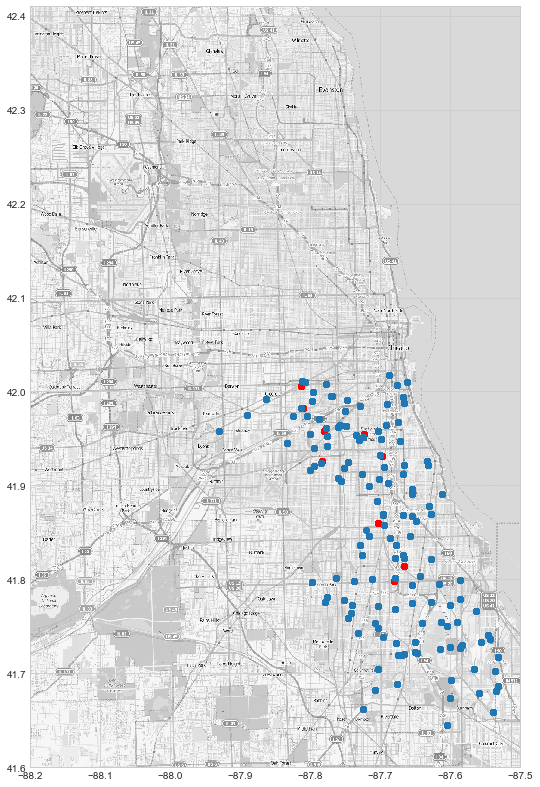

In [48]:
mapdata = np.loadtxt("./data/west_nile/input/mapdata_copyright_openstreetmap_contributors.txt")

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88.2, -87.5, 41.6, 42.41)

plt.figure(figsize=(12,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('Greys_r'), 
           extent=lon_lat_box, 
           aspect=aspect)

# locations = aggregated[['Longitude', 'Latitude']].drop_duplicates().values

plt.scatter(merge_all.midpt_Lon,merge_all.midpt_Lat, marker = 'o', c='red')
plt.scatter(merge_all.Longitude, merge_all.Latitude ,marker = 'o')

In [56]:
merge_all.to_csv('merged_data.csv')